# 1. import & check version

In [1]:
import numpy as np
np.__version__

'1.16.4'

# 2. Create a 1D array of numbers from 0 to 9create 1d array

In [2]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 3. Create a 3×3 numpy array of all True’s

In [3]:
# np.ones(shape, dtype)
np.ones(9, dtype=bool).reshape(3,3)
np.ones((3,3), dtype=bool)

# np.full(shape, fill_value)
np.full((3,3), True)

# 兩種思路
### 1. 用 ones 做 3*3 的矩陣，dtype 改 bool，那 1 就會變成 True
### 2. 用 full 做 3*3 的矩陣，fill value 指定 True

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

# 4. Extract all odd numbers from "arr"

In [4]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

arr[np.mod(arr, 2) == 1]
arr[arr % 2 == 1]

array([1, 3, 5, 7, 9])

# 5. Replace all odd numbers in "arr" with -1

In [5]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

arr[arr % 2 ==1] = -1

arr

array([ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1])

# 6. Replace all odd numbers in "arr" with -1 without changing arr

In [6]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# np.where(condition, 要變的值, 剩下的值)
out = np.where(arr % 2 == 1, -1, arr)

# 7. Convert a 1D array to a 2D array with 2 rows

In [7]:
np.arange(10).reshape(2, -1) # Setting to -1 automatically decides the number of cols

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

# 8. Stack arrays a and b vertically

In [8]:
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

np.vstack((a, b))
np.concatenate([a, b], axis=0)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

# 9. Stack the arrays a and b horizontally

In [9]:
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

np.hstack((a, b))

array([[0, 1, 2, 3, 4, 1, 1, 1, 1, 1],
       [5, 6, 7, 8, 9, 1, 1, 1, 1, 1]])

# 10. Generate custom sequences in numpy without hardcoding

In [10]:
# desired output: array([1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])

a = np.array([1,2,3])

# np.repeat(array, repeats, axis): 重複 array 中的元素 n 次
# np.tile(array, repeats): 重複整個 array N 次

np.hstack((np.repeat(a, 3), np.tile(a, 3)))

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])

# 11. Get the common items between a and b

In [11]:
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])

np.intersect1d(a, b)

array([2, 4])

# 12. From array a remove all items present in array b

In [12]:
a = np.array([1,2,3,4,5])
b = np.array([5,6,7,8,9])

# for list comprehension
np.asarray( [i for i in a if i not in b] )

# for numpy
# From 'a' remove all of 'b'
np.setdiff1d(a,b)

array([1, 2, 3, 4])

# 13. Get the positions where elements of a and b match

In [13]:
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])

# np.where(condition, 要變的值, 剩下的值)
np.where(a == b)

# np.where 最基本用途就是抓根據 condition 抓 index
# 當輸入要變的值 x 跟剩下的值 y 之後，就可以做到替換值的作用，詳 # 6

(array([1, 3, 5, 7], dtype=int64),)

# 14. Get all items between 5 and 10 from a

In [14]:
a = np.array([2, 6, 1, 9, 10, 3, 27])

a[(a>=5) & (a<=10)] # 注意這裡要將條件式用 () 包起來

a[np.where((a >= 5) & (a <= 10))]
a[np.where(np.logical_and(a>=5, a<=10))]

array([ 6,  9, 10])

# 15. Make a python function that handles scalars to work on numpy arrays

In [15]:
def maxx(x, y):
    """Get the maximum of two items"""
    if x >= y:
        return x
    else:
        return y

maxx(1, 5)

# 問題：該怎麼把普通的 function 透過 numpy 轉成 vetor 的計算?

5

In [16]:
a = np.array([5, 7, 9, 8, 6, 4, 5])
b = np.array([6, 3, 4, 8, 9, 7, 1])

pair_max = np.vectorize(maxx, otypes=[float])

print(pair_max(a, b))

# 或是直接用 np.where 就好
print(np.where(a > b, a, b))

[6. 7. 9. 8. 9. 7. 5.]
[6 7 9 8 9 7 5]


# 16&17. Swap two columns/rows in a 2d numpy array

In [17]:
arr = np.arange(9).reshape(3,3)
print(arr)

print(arr[:, (1,0,2)])
print(arr[(1,0,2), :])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[1 0 2]
 [4 3 5]
 [7 6 8]]
[[3 4 5]
 [0 1 2]
 [6 7 8]]


# 18&19. Reverse the rows/column of a 2D array

In [18]:
arr = np.arange(9).reshape(3,3)

print(arr)

# reverse row
arr[::-1, :]
print(np.flipud(arr)) # 使用 flipud: Reverse the order of elements along axis 0

# reverse column
arr[:, ::-1]
print(np.fliplr(arr))  # 使用 fliplr: Reverse the order of elements along axis 1

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[6 7 8]
 [3 4 5]
 [0 1 2]]
[[2 1 0]
 [5 4 3]
 [8 7 6]]


# 20. Create a 2D array containing random floats between 5 and 10

In [19]:
# random.randint(low, high=None, size=None, dtype=int): 隨機整數
np.random.randint(low = 5, high = 10, size = (5,3))

# random.uniform(low=0.0, high=1.0, size=None): 隨機小數
np.random.uniform(low = 5, high = 10, size = (5,3))

array([[8.28843074, 5.42823515, 6.75217525],
       [8.72357311, 8.98597094, 7.87707508],
       [8.89584431, 8.23307413, 6.94334215],
       [5.14019554, 7.48890719, 5.96814027],
       [7.18674226, 8.71742808, 6.57687389]])

# 21. Print only 3 decimal places in python numpy array
# 22. Pretty print a numpy array by suppressing the scientific notation
# 23. Limit the number of items printed in output of numpy array
# 24. Print the full numpy array without truncating

In [20]:
np.random.seed(100)
rand_arr = np.random.random([3,3])/1e3

# suppress = True (不用科學記號表示)；precision = 顯示到小數第幾位；threshold = 限制印出的數量
np.set_printoptions(suppress=True, precision=6, threshold=6)

print(rand_arr)


a = np.arange(20)
print("中間都省略了", a)

# 如果想要復原 threshold 的設定，就把它變回 maxsize
import sys
np.set_printoptions(threshold=sys.maxsize)

print(a)

[[0.000543 0.000278 0.000425]
 [0.000845 0.000005 0.000122]
 [0.000671 0.000826 0.000137]]
中間都省略了 [ 0  1  2 ... 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


# 25. Import dataset

In [21]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')

# col names: 'sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species'
iris[:4]

array([[b'5.1', b'3.5', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.9', b'3.0', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.7', b'3.2', b'1.3', b'0.2', b'Iris-setosa'],
       [b'4.6', b'3.1', b'1.5', b'0.2', b'Iris-setosa']], dtype=object)

# 26. Extract a particular column from 1D array of tuples

In [22]:
iris[0:2, 4]

array([b'Iris-setosa', b'Iris-setosa'], dtype=object)

In [23]:
iris_2d = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])
iris_2d[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

# 27. Compute the mean, median, standard deviation of a numpy array

In [24]:
a = iris_2d[:, 0]

print(np.mean(a), np.median(a), np.std(a))


5.843333333333334 5.8 0.8253012917851409


# 28. Normalize an array so the values range exactly between 0 and 1

In [25]:
a = iris_2d[:, 0]

# max-min
S_max, S_min = a.max(), a.min()
(a - S_min) / (S_max - S_min)

### ptp function: a.ptp() 就會是陣列中的最大值減最小值

array([0.222222, 0.166667, 0.111111, 0.083333, 0.194444, 0.305556,
       0.083333, 0.194444, 0.027778, 0.166667, 0.305556, 0.138889,
       0.138889, 0.      , 0.416667, 0.388889, 0.305556, 0.222222,
       0.388889, 0.222222, 0.305556, 0.222222, 0.083333, 0.222222,
       0.138889, 0.194444, 0.194444, 0.25    , 0.25    , 0.111111,
       0.138889, 0.305556, 0.25    , 0.333333, 0.166667, 0.194444,
       0.333333, 0.166667, 0.027778, 0.222222, 0.194444, 0.055556,
       0.027778, 0.194444, 0.222222, 0.138889, 0.222222, 0.083333,
       0.277778, 0.194444, 0.75    , 0.583333, 0.722222, 0.333333,
       0.611111, 0.388889, 0.555556, 0.166667, 0.638889, 0.25    ,
       0.194444, 0.444444, 0.472222, 0.5     , 0.361111, 0.666667,
       0.361111, 0.416667, 0.527778, 0.361111, 0.444444, 0.5     ,
       0.555556, 0.5     , 0.583333, 0.638889, 0.694444, 0.666667,
       0.472222, 0.388889, 0.333333, 0.333333, 0.416667, 0.472222,
       0.305556, 0.472222, 0.666667, 0.555556, 0.361111, 0.333

# 29. Find xx% percentile value

In [26]:
np.percentile(iris_2d[0:, ], q = 75) # 75% percentile

5.1

# 30. Insert values at random positions in an array

In [27]:
randomX = np.random.randint(150, size = 20)
randomY = np.random.randint(4, size = 20)

iris_2d[randomX, randomY] = np.nan

print(iris_2d)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  nan 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 nan]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  nan 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# 31. Find the position of missing values in numpy array

In [28]:
position = np.where(np.isnan(iris_2d[:, 0]))

num = np.isnan(iris_2d[:, 0]).sum()

print("position:", position)
print("Number of missing value:", num)

position: (array([67, 93], dtype=int64),)
Number of missing value: 2


# 32. Filter the rows of iris_2d that has petallength (3rd column) > 1.5 and sepallength (1st column) < 5.0

In [37]:
# col names: 'sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_2d = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])

iris_2d[(iris_2d[:, 2] > 1.5) & (iris_2d[:, 0] < 5.0)]

array([[4.8, 3.4, 1.6, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [4.9, 2.4, 3.3, 1. ],
       [4.9, 2.5, 4.5, 1.7]])

# 33. Drop rows that contain a missing value from a numpy array

In [85]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_2d = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])

np.random.seed(50)
randomX = np.random.randint(150, size = 20)
randomY = np.random.randint(4, size = 20)

iris_2d[randomX, randomY] = np.nan

# 用 np.any 去確認 array 中是否有任一 true，而我們用 np.isnan 去判斷每一 row 的每一個 element 是否有 nan 存在
# 透過 list comprehension 的方式下 for loop
missing_value_row_index = np.array([np.any(np.isnan(row)) for row in iris_2d]) 

iris_2d[~missing_value_row_index] # ~ 波浪符代表反向邏輯

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.4, 3

# 34. Find the correlation between two columns of a numpy array 

In [89]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])

# np.corrcoef 相關係數
np.corrcoef(iris[:, 0], iris[:, 1])

array([[ 1.      , -0.109369],
       [-0.109369,  1.      ]])

# 35. Find if a given array has any null values

In [95]:
np.isnan(iris_2d).sum() > 0

np.isnan(iris_2d).any()

True

# 36. Replace all missing values with 0 in a numpy array

In [98]:
iris_2d[np.isnan(iris_2d)] = 0
np.isnan(iris_2d).any()

False

# 37. Find the count of unique values in a numpy array

In [109]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')

unique, count = np.unique(iris[:, 4], return_counts=True)

print(unique, "\n", count)

[b'Iris-setosa' b'Iris-versicolor' b'Iris-virginica'] 
 [50 50 50]


# 38. Convert a numeric to a categorical (text) array

In [150]:
# Q. Bin the petal length (3rd) column of iris_2d to form a text array, such that if petal length is:
# Less than 3 --> 'small'
# 3-5 --> 'medium'
# '>=5 --> 'large'


petal_length = iris_2d[:, 2]

bins_width = [0, 3, 5, np.inf]
names = ['small', 'medium', 'large']

d = dict(enumerate(names, 1)) # 用 enumerate 列舉就不用手動輸入 dic value 了
print(d)

# Method 1
# 把 patal_width 用 np.digitize() 按照我們希望的 bin 大小分類成 1,2,3 (對應者 dict. 的 1,2,3 keys)
# 用 list comprehension 一個一個按照 dict. 的 1,2,3 轉成字串

patal_length_cat = np.digitize(petal_length, bins = bins_width)
np.array([d[i] for i in patal_length_cat])[:4]

{1: 'small', 2: 'medium', 3: 'large'}


array(['small', 'small', 'small', 'small'], dtype='<U6')

In [151]:
# Method 2
# 用 dict. object 的基本 function: get()，用 key 找 value
# 透過 np.vectorize()，把原本只能輸入一個變數的 function 向量化
# 把 patal_width 用 np.digitize() 按照我們希望的 bin 大小分類成 1,2,3 (對應者 dict. 的 1,2,3 keys)
# 最後用向量化後的 get() function 將 1,2,3 轉成我們希望的字串

d_get_vec = np.vectorize(d.get)
d_get_vec(np.digitize(petal_length, bins = bins_width))[:4]

array(['small', 'small', 'small', 'small'], dtype='<U6')

# 39. Create a new column from existing columns of a numpy array

In [170]:
petal_length = iris_2d[:, 2]
sepal_length = iris_2d[:, 0]

vol = (np.pi * petal_length * sepal_length) / 3 # 可用 np.pi or math.pi
vol = vol[:, np.newaxis] 
# !!! 如果在這裡不把 vol 插入一個維度的話，那要用 hstack 合併的時候，會因為 vol 是 1d 資料而無法跟 2d 的 iris_2d 合併

np.hstack((iris_2d, vol))[:4]

array([[5.1     , 3.5     , 1.4     , 0.2     , 7.476991],
       [4.9     , 3.      , 1.4     , 0.2     , 7.183775],
       [4.7     , 3.2     , 1.3     , 0.      , 6.398377],
       [4.6     , 3.1     , 1.5     , 0.2     , 7.225663]])

# 40. Randomly sample iris's species such that setose is twice the number of versicolor and virginica

sample 的時候某一種類型的機率要兩倍

In [183]:
# Approach 1: Generate Probablistically
np.random.seed(100)
a = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
species_out = np.random.choice(a, 150, p=[0.5, 0.25, 0.25])

# Approach 2: Probablistic Sampling (preferred)
# Approach 2 is preferred because it creates an index variable that can be used to sample 2d tabular data.
np.random.seed(100)

# 在這裡因為是要把多個 array 併在一起成 1d array，用 np.r_ 或者是 np.ravel 都可以，都是 axis = 0 的合併
probs = np.r_[np.linspace(0, 0.500, num=50), np.linspace(0.501, .750, num=50), np.linspace(.751, 1.0, num=50)]
index = np.searchsorted(probs, np.random.random(150))
species_out = iris[index, 4]
print(np.unique(species_out, return_counts=True))

(array([b'Iris-setosa', b'Iris-versicolor', b'Iris-virginica'],
      dtype=object), array([77, 37, 36], dtype=int64))


## 詳解 np.searchsorted 的用途

np.searchsorted(a, v, side='left', soter='none')
其中 a, v 都是要放入陣列，官方的釋例如下，left/right 只是等號包在左邊還右邊的差別而已：

left：a[i-1] < v <= a[i]

right：a[i-1] <= v < a[i]

serachsorted function 會幫我們逐一比對 v 中的所有元素，應該要插在 a 中的哪個位置，下面有個更簡單的例子

a = [0.1, 0.5, 1.1, 3.9]

v = [1, 0.3, 4, 1.5]

np.searchsorted(a, b, side='left')

結果就會是 [2, 1, 4, 3]
### ----- 

所以上面寫的 np.searchsorted(probs, np.random.random(150)) 解釋為：

先建立一個 probs array，讓 0-0.5 切50份，0.501-0.75 和 0.751-1.0 各切50份合併（藉此建立出150個index的概念）
這樣做的用意是讓我隨機產生一個 0-1之間的數字時，50%的機率會是前50個index，各25%的機率會是後51-100 & 101-150

# 41. Get the second largest value of an array when grouped by another array
Q. What is the value of second longest petallength of species setosa

In [230]:
# Input
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')
names = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species')

petal_len_setosa = iris[iris[:, 4] == b'Iris-setosa', 2].astype(float)
np.sort(np.unique(petal_len_setosa))[-2] # 預設 order 是升冪，取倒數第二個值


1.7

# 42. Sort a 2D array by a column
Q. Sort the iris dataset based on sepallength column.

In [245]:
# 兩種使用 argsort() 的方式
np.argsort(iris[:, 0])
iris[:, 0].argsort()

iris[iris[:, 0].argsort(), ][:4, ]

array([[b'4.3', b'3.0', b'1.1', b'0.1', b'Iris-setosa'],
       [b'4.4', b'3.2', b'1.3', b'0.2', b'Iris-setosa'],
       [b'4.4', b'3.0', b'1.3', b'0.2', b'Iris-setosa'],
       [b'4.4', b'2.9', b'1.4', b'0.2', b'Iris-setosa']], dtype=object)

# 43. Find the most frequent value in a numpy array

In [262]:
uniques, counts = np.unique(iris[:, 2], return_counts=True)
uniques[counts.argmax()]

b'1.5'

# 46. Find the position of the first occurrence of a value greater than a given value
Q. Find the position of the first occurrence of a value greater than 1.0 in petalwidth 4th column of iris dataset.

In [274]:
petal_width = iris[:, 3].astype(float)

np.where(petal_width > 1)[0].min()

# 可以用 np.argwhere 直接找
np.argwhere(petal_width > 1)[0]


array([50], dtype=int64)

# 47. Replace all values greater than a given value to a given cutoff
Q. From the array a, replace all values greater than 30 to 30 and less than 10 to 10.

In [282]:
np.random.seed(100)
a = np.random.uniform(1,50, 20)

# Solution 1: Using np.clip
np.clip(a, a_min=10, a_max=30)

# Solution 2: Using np.where, nested
print(np.where(a < 10, 10, np.where(a > 30, 30, a)))

# My Solution, 但這種作法會改到原變數
a[a > 30] = 30
a[a < 10] = 10

array([27.626842, 14.6401  , 21.801362, 30.      , 10.      , 10.      ,
       30.      , 30.      , 10.      , 29.179573, 30.      , 11.250904,
       10.081083, 10.      , 11.765177, 30.      , 30.      , 10.      ,
       30.      , 14.429614])

# 48. Get the positions of top n values from a numpy array
Q. Get the positions of top 5 maximum values in a given array a.

In [361]:
np.random.seed(100)
a = np.random.uniform(1,50, 20)

# My Solution: 先抓出 top_n: values，再用 np.isin + np.where 抓出 index
top_n = np.sort(a)[-5:]
np.where(np.isin(a, top_n))

# Solution1: np.argsort 會將 array 由小到大排序，回傳 index（並非直接將值排序完回傳 array，而是告訴你該怎麼排序）
# 這時候就抓到數五個值就是最大的 5 個值的 position (index)
print(a.argsort()[-5:])


# Solution2: np.argpartition 會將 array 由小到大排序，回傳 index
# 但注意這個 function 的特殊用途是只在乎 kth 個值，意思是我排完前幾小之後的值在哪我就不管了，所以找前 kth 個值很有效率
# 本題要找最大，所以我們先把 a 陣列變成負數，這樣由小排到大找前 5 小的值，其實就是找前 5 大了

print(np.argpartition(-a, 5)[:5])

[18  7  3 10 15]
[15 10  3  7 18]


In [366]:
np.partition(a, kth=-5)

array([11.250904, 14.429614, 21.801362,  9.42511 ,  1.231224,  6.956887,
       11.765177,  6.310468,  7.698623, 14.6401  , 10.081083, 27.626842,
       40.772474, 33.866705, 29.179573, 40.995013, 41.466785, 42.39403 ,
       44.674776, 48.952565])

# 49. Compute the row wise counts of all possible values in an array
Q. Compute the counts of unique values row-wise

假設矩陣僅包含 1-10 的數字

每一個 row 要分別算 1-10 各別出現多少次，並以 0出現幾次, 1出現幾次, 2出現幾次,... 的原則下去呈現

In [400]:
# Input:
# array([[ 9,  9,  4,  8,  8,  1,  5,  3,  6,  3],
#        [ 3,  3,  2,  1,  9,  5,  1, 10,  7,  3],
#        [ 5,  2,  6,  4,  5,  5,  4,  8,  2,  2],
#        [ 8,  8,  1,  3, 10, 10,  4,  3,  6,  9],
#        [ 2,  1,  8,  7,  3,  1,  9,  3,  6,  2],
#        [ 9,  2,  6,  5,  3,  9,  4,  6,  1, 10]])

# Ouput:
# [[1, 0, 2, 1, 1, 1, 0, 2, 2, 0],
#  [2, 1, 3, 0, 1, 0, 1, 0, 1, 1],
#  [0, 3, 0, 2, 3, 1, 0, 1, 0, 0],
#  [1, 0, 2, 1, 0, 1, 0, 2, 1, 2],
#  [2, 2, 2, 0, 0, 1, 1, 1, 1, 0],
#  [1, 1, 1, 1, 1, 2, 0, 0, 2, 1]]

In [386]:
np.random.seed(100)
arr = np.random.randint(1,11,size=(6, 10))
arr

array([[ 9,  9,  4,  8,  8,  1,  5,  3,  6,  3],
       [ 3,  3,  2,  1,  9,  5,  1, 10,  7,  3],
       [ 5,  2,  6,  4,  5,  5,  4,  8,  2,  2],
       [ 8,  8,  1,  3, 10, 10,  4,  3,  6,  9],
       [ 2,  1,  8,  7,  3,  1,  9,  3,  6,  2],
       [ 9,  2,  6,  5,  3,  9,  4,  6,  1, 10]])

In [399]:
def ccc(arr):
    temp=np.zeros(len(arr)).astype(int)
    ind, counts=np.unique(arr, return_counts=True)
    temp[ind-1] = counts
    return(temp)

[ccc(row) for row in arr]

[array([1, 0, 2, 1, 1, 1, 0, 2, 2, 0]),
 array([2, 1, 3, 0, 1, 0, 1, 0, 1, 1]),
 array([0, 3, 0, 2, 3, 1, 0, 1, 0, 0]),
 array([1, 0, 2, 1, 0, 1, 0, 2, 1, 2]),
 array([2, 2, 2, 0, 0, 1, 1, 1, 1, 0]),
 array([1, 1, 1, 1, 1, 2, 0, 0, 2, 1])]

In [401]:
# 官方解答 (還沒有看懂，連英文字母都可以處理)
def counts_of_all_values_rowwise(arr2d):
    # Unique values and its counts row wise
    num_counts_array = [np.unique(row, return_counts=True) for row in arr2d]

    # Counts of all values row wise
    return([[int(b[a==i]) if i in a else 0 for i in np.unique(arr2d)] for a, b in num_counts_array])

# Print
print(np.arange(1,11))
counts_of_all_values_rowwise(arr)

[ 1  2  3  4  5  6  7  8  9 10]


[[1, 0, 2, 1, 1, 1, 0, 2, 2, 0],
 [2, 1, 3, 0, 1, 0, 1, 0, 1, 1],
 [0, 3, 0, 2, 3, 1, 0, 1, 0, 0],
 [1, 0, 2, 1, 0, 1, 0, 2, 1, 2],
 [2, 2, 2, 0, 0, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 2, 0, 0, 2, 1]]

# 50. Convert an array of arrays into a flat 1d array

In [19]:
arr1 = np.arange(3)
arr2 = np.arange(3,7)
arr3 = np.arange(7,10)

array_of_arrays = np.array([arr1, arr2, arr3])

# Method1: list comprehension
np.array([a for array in array_of_arrays for a in array])

# Method2: np.concatenate
np.concatenate(array_of_arrays)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 51. Generate one-hot encodings for an array in numpy

In [33]:
np.random.seed(101) 
arr = np.random.randint(1,4, size=6)

# Method1: 僅適用數字類型
np.eye(3)[arr-1]

# Method2: 僅適用數字類型
def one_hot_encodings(arr):
    uniqs = np.unique(arr)
    out = np.zeros((arr.shape[0], uniqs.shape[0]))
    for i, k in enumerate(arr):
        out[i, k-1] = 1
    return out

one_hot_encodings(arr)

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

# 52. Create row numbers grouped by a categorical variable
就像 SQL 的 window-function

In [109]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
species = np.genfromtxt(url, delimiter=',', dtype='str', usecols=4)

np.random.seed(100)

species_small = np.sort(np.random.choice(species, size=20))

uniques, counts = np.unique(species_small, return_counts=True)

for i,j in zip(uniques, counts):
    species_small[np.where(species_small == i)] = np.arange(j)

species_small

array(['0', '1', '2', '3', '4', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '0', '1', '2', '3', '4', '5'], dtype='<U15')

# 53.  Create group ids based on a given categorical variable

In [19]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
species = np.genfromtxt(url, delimiter=',', dtype='str', usecols=4)
species_small = np.sort(np.random.choice(species, size=20))

# return_inverse 參數可以直接達到題目需求，把 categorial 資料轉成 0,1,2,3,..
np.unique(species_small, return_inverse=True)[1].tolist()

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]

# 54. Rank items in an array using numpy

In [64]:
np.random.seed(10)
a = np.random.randint(20, size=10)
print(a)

# argsort 第一次獲得排序結果 (index 隱含 ranking 資訊)，argsort 第二次等同將 ranking 擺回正確位置
print(np.argsort(np.argsort(a)))

[ 9  4 15  0 17 16 17  8  9  0]
[4 2 6 0 8 7 9 3 5 1]


# 55. Rank items in a multidimensional array using numpy

In [77]:
np.random.seed(10)
a = np.random.randint(20, size=[2,5])
print(a)

a.ravel().argsort().argsort().reshape(a.shape)

[[ 9  4 15  0 17]
 [16 17  8  9  0]]


array([[4, 2, 6, 0, 8],
       [7, 9, 3, 5, 1]], dtype=int64)

# 56. Find the maximum value in each row of a numpy array 2d

In [82]:
np.random.seed(100)
a = np.random.randint(1,10, [5,3])
print(a)

# My solution
print([max(row) for row in a])

# Solution 1
print(np.amax(a, axis=1))

# Solution 2: apply_along_axis
print(np.apply_along_axis(np.max, arr=a, axis=1))

[[9 9 4]
 [8 8 1]
 [5 3 6]
 [3 3 3]
 [2 1 9]]
[9, 8, 6, 3, 9]
[9 8 6 3 9]
[9 8 6 3 9]


# 57. Compute the min-by-max for each row for a numpy array 2d

In [83]:
np.random.seed(100)
a = np.random.randint(1,10, [5,3])
a

# My solution
[min(row) / max(row) for row in a]

# Solution
np.apply_along_axis(lambda x: np.min(x)/np.max(x), arr=a, axis=1)

array([[9, 9, 4],
       [8, 8, 1],
       [5, 3, 6],
       [3, 3, 3],
       [2, 1, 9]])

# 58. Find the duplicate records in a numpy array

In [159]:
np.random.seed(100)
a = np.random.randint(0, 5, 10)
print('Array: ', a)

# step1: create an all true array 
rrr = np.ones_like(a, dtype=bool)

# step2: find the index position of unique elements and mark those positions as "false"
rrr[np.unique(a, return_index=True)[1]] = False

rrr

Array:  [0 0 3 0 2 4 2 2 2 2]


array([False,  True, False,  True, False, False,  True,  True,  True,
        True])

# 59. Find the grouped mean in numpy

In [185]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')
names = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species')

numeric_column = iris[:, 1].astype('float')  # sepalwidth
grouping_column = iris[:, 4]  # species

In [186]:
# for loop
for i in np.unique(grouping_column):
    print(list((i, np.mean(numeric_column[grouping_column == i]))))

[b'Iris-setosa', 3.418]
[b'Iris-versicolor', 2.7700000000000005]
[b'Iris-virginica', 2.974]


In [187]:
# list comprehenshion
[[i, np.mean(numeric_column[grouping_column == i])] for i in np.unique(grouping_column)]

[[b'Iris-setosa', 3.418],
 [b'Iris-versicolor', 2.7700000000000005],
 [b'Iris-virginica', 2.974]]

# 60. Convert a PIL image to numpy array (我沒有練習)

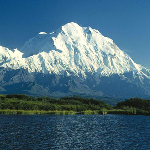

In [209]:
from io import BytesIO
from PIL import Image
import PIL, requests

# Import image from URL
URL = 'https://upload.wikimedia.org/wikipedia/commons/8/8b/Denali_Mt_McKinley.jpg'
response = requests.get(URL)

# Read it as Image
I = Image.open(BytesIO(response.content))

# Optionally resize (壓縮圖片成 150*150 pixels)
I = I.resize([150,150])

# Convert to numpy array (numpy.asarray 可以把 image 轉成 array)
arr = np.asarray(I)

I

# 61. Drop all missing values from a numpy array

In [217]:
a = np.array([1,2,3,np.nan,5,6,7,np.nan])
print(a)

a[~np.isnan(a)]

[ 1.  2.  3. nan  5.  6.  7. nan]


array([1., 2., 3., 5., 6., 7.])

# 62. Compute the euclidean distance between two arrays

In [218]:
# Input
a = np.array([1,2,3,4,5])
b = np.array([4,5,6,7,8])

# Solution
dist = np.linalg.norm(a-b)
dist

6.708203932499369

# 63. Find all the local maxima (or peaks) in a 1d array

In [251]:
a = np.array([1, 3, 7, 4, 2, 6, 0, 1])

# My solution:
# 因為 peak 不會出現在頭尾，所以我們只要抓中間的資料出來比較就好 a[1:-1]
# 中間的資料每一個 element 都分別去減自己前後一位的 element，兩個結果都必須 > 0 才是 peak
# 最後再回推正確的 index position 就完成

position = np.where((a[1:-1] - a[2:] > 0) & (a[1:-1] - a[:-2] > 0))[0] + 1

print("position:", position)
print("peak value:", a[position])

# other solution:
# np.diff 的作用是後一位 element 減前一位 element 的計算
# np.sign 是將 elements 進行正負的判斷，若為正則轉為 1，若為負則轉為 -1

# 第一次相減結果為負的代表那個位置的值比前一位 element 大
# 轉成 +-1 方便控制計算結果
# 第二次相減結果為 -2 的代表那個位置的值比後一位 element 大
# 最後再回推正確的 index position 就完成（這部份看 my solution 比較直觀一點）

# 做不做 np.sign 也沒關係，判斷式改 doulbediff < 0 就可以

doublediff = np.diff(np.sign(np.diff(a)))
peak_locations = np.where(doublediff == -2)[0] + 1
print(peak_locations)


position: [2 5]
peak value: [7 6]
[2 5]


# 64. Subtract a 1d array from a 2d array
Q. Subtract the 1d array b_1d from the 2d array a_2d, such that each item of b_1d subtracts from respective row of a_2d.

In [269]:
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])

# Solution
print(a_2d - b_1d[:,None])

# Ny solution
a_2d - b_1d.reshape(3,1)

[[2 2 2]
 [2 2 2]
 [2 2 2]]


array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

# 65. Find the index of n'th repetition of an item in an array
Q. Find the index of 5th repetition of number 1 in x.

In [280]:
x = np.array([1, 2, 1, 1, 3, 4, 3, 1, 1, 2, 1, 1, 2])

np.where(x == 1)[0][4]

8

# 66. compute the moving average of a numpy array

In [341]:
np.random.seed(100)
Z = np.random.randint(10, size=10)

Z

array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])

In [342]:
def moving_average(arr, n):
    counter = 0
    lst = []
    
    for i in range(n, arr.shape[0]):
        lst.append(arr[counter:i].mean())
        counter += 1
        
    return(lst)

moving_average(Z, 3)

[6.333333333333333,
 6.0,
 5.666666666666667,
 4.666666666666667,
 3.6666666666666665,
 2.0,
 3.6666666666666665]

# 67. Create a numpy array sequence given only the starting point, length and the step

In [349]:
length = 10
start = 5
step = 3

def seq_func(start, length, step):
    end = start + length * step
    return(np.arange(start, end, step))

seq_func(start, length, step)

array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32])

# 68. Fill in missing dates in an irregular series of numpy dates

In [355]:
dates = np.arange(np.datetime64('2018-02-01'), np.datetime64('2018-02-25'), 2)
print(dates)

# My solution:
# 不管中間缺啥，直接抓頭尾做一個新的 array
print(np.arange(np.min(dates), np.max(dates)+1))

['2018-02-01' '2018-02-03' '2018-02-05' '2018-02-07' '2018-02-09'
 '2018-02-11' '2018-02-13' '2018-02-15' '2018-02-17' '2018-02-19'
 '2018-02-21' '2018-02-23']
['2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04' '2018-02-05'
 '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09' '2018-02-10'
 '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14' '2018-02-15'
 '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19' '2018-02-20'
 '2018-02-21' '2018-02-22' '2018-02-23']


# 69. Create strides from a given 1D array
Q. From the given 1d array arr, generate a 2d matrix using strides, with a window length of 4 and strides of 2, like [[0,1,2,3], [2,3,4,5], [4,5,6,7]..]

In [381]:
arr = np.arange(15) 
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [432]:
# 以下兩個 solutions 沒什麼好壞差別，速度也差不多
# 硬要說的話對我來說 solution2 讀起來比較難懂

# Solution 1: loop
def stride_arr(arr, length, stride):
    temp = []
    i = 0
    while i < arr.shape[0] - length:
        temp.append(arr[i:length+i])
        i += stride
        
    return(np.array(temp))

# Solution 2: list comprehension，跟 1 的主要差別只有先算出 end position 而已
def stride_arr_2(arr, length, stride):
    max_steps = (arr.size-length)//stride # 最多只能進幾步
    end_position = max_steps * stride # 從 0 開始到這個位置結束
    
    return(np.array([arr[i:(length+i)] for i in np.arange(0, end_position+1, stride)]))

In [433]:
stride_arr(arr, 4, 2)

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])

In [434]:
stride_arr_2(arr, 4, 2)

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])

In [441]:
import time
start = time.time()
stride_arr(np.arange(20000000), 4, 2)
end = time.time()
print(end - start)

8.664905071258545


In [442]:
start = time.time()
stride_arr_2(np.arange(20000000), 4, 2)
end = time.time()
print(end - start)

10.20543122291565
